In [1]:
import h5py, os, glob
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from imp import reload

from noise_correlations.data import datasets
from noise_correlations import discriminability, null_models
from noise_correlations.discriminability import lfi_data, lda_data, corrected_lfi_data
from noise_correlations.null_models import random_rotation_data, shuffle_data
from noise_correlations import plot

In [63]:
# data paths
fname = 'nc_datasets/R32_B7_MUAR_ext_rsp.h5'
with h5py.File(fname, 'r') as f:
    resp = f['final_rsp'].value
n_el, n_samples, n_freq, n_attn = resp.shape
Yp = np.transpose(resp[..., 5], axes=(0, 2, 1))
bfs = np.median(Yp, axis=-1).argmax(axis=1)
idxs = np.argsort(bfs)
bfs = bfs[idxs]
Yp = Yp[idxs]

In [46]:
delta_log_bf = abs(bfs[np.newaxis] - bfs[:, np.newaxis])

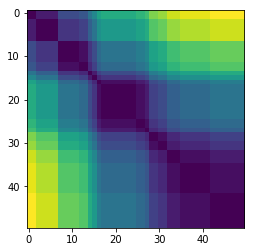

In [47]:
plt.imshow(delta_log_bf)

In [71]:
delta_fs = 2
delta_es = 2
n_boot = 10000

n_pts = 0
for ii in range(n_el - 2):
    for d in range(delta_es):
        n0 = ii
        n1 = ii + d + 1
        minf = max(0, bfs[n0] - delta_fs)
        maxf = min(n_freq - 1, bfs[n1] + delta_fs + 1)
        n_pts += maxf - minf
print(n_pts)
    
ps = np.full((2, 2, n_pts), np.nan)
idx = 0
for ii in range(n_el - 2):
    print(float(idx) / n_pts)
    for d in range(delta_es):
        n0 = ii
        n1 = ii + d + 1
        minf = max(0, bfs[n0] - delta_fs)
        maxf = min(n_freq - 1, bfs[n1] + delta_fs + 1)
        for f in range(minf, maxf):
            x = Yp[[n0, n1]][:, f].T
            y = Yp[[n0, n1]][:, f + 1].T
            val_s, values_s, ps_s = null_models.eval_null_data(x, y, shuffle_data, [lfi_data, lda_data], n_boot)
            val_r, values_r, ps_r = null_models.eval_null_data(x, y, random_rotation_data, [lfi_data, lda_data], n_boot)
            ps[0, :, idx] = ps_s
            ps[1, :, idx] = ps_r
            idx += 1

514
0.0
0.023346303501945526
0.05058365758754864
0.07003891050583658
0.08949416342412451
0.10894941634241245
0.13618677042801555
0.17120622568093385
0.19066147859922178
0.21011673151750973
0.22957198443579765
0.2509727626459144
0.27431906614785995
0.29961089494163423
0.3346303501945525
0.36770428015564205
0.40077821011673154
0.42412451361867703
0.44357976653696496
0.46303501945525294
0.48249027237354086
0.5019455252918288
0.5214007782101168
0.5408560311284046
0.5622568093385214
0.585603112840467
0.6070038910505836
0.6361867704280155
0.6673151750972762
0.688715953307393
0.7120622568093385
0.7354085603112841
0.7626459143968871
0.7821011673151751
0.8015564202334631
0.8210116731517509
0.8365758754863813
0.8521400778210116
0.867704280155642
0.8832684824902723
0.8988326848249028
0.914396887159533
0.9299610894941635
0.9416342412451362
0.953307392996109
0.9649805447470817
0.9766536964980544
0.9883268482490273


In [73]:
np.savez('ps_max', ps=ps)

sig shuffle:  0.35797665369649806
sig rotate:  0.0914396887159533
only sig shuffle:  0.26848249027237353
only sig rotate:  0.0019455252918287938
sig both:  0.08949416342412451

sig shuffle:  0.06614785992217899
sig rotate:  0.013618677042801557
only sig shuffle:  0.054474708171206226
only sig rotate:  0.0019455252918287938
sig both:  0.011673151750972763



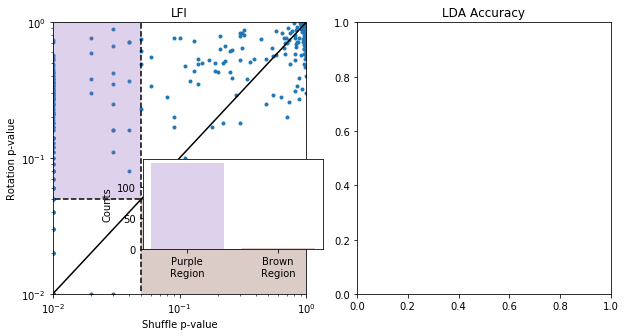

In [70]:
reload(plot)
faxes = plt.subplots(1, 2, figsize=(10, 5))
f, (ax0, ax1) = faxes
plot.plot_pvalue_comparison(ps[0, 0].ravel(), ps[1, 0].ravel(),
                           labels=['Shuffle p-value', 'Rotation p-value'], faxes=(f, ax0))
#plot.plot_pvalue_comparison(ps[0, 1].ravel(), ps[1, 1].ravel(),
#                       labels=['Shuffle p-value', 'Rotation p-value'], faxes=(f, ax1))
ax0.set_title('LFI')
ax1.set_title('LDA Accuracy')
#plt.savefig('/home/jesse/Downloads/maxd.pdf')

for ii in range(2):
    print('sig shuffle: ', (ps[0, ii] <= .05).sum() / ps[0, ii].size)
    print('sig rotate: ', (ps[1, ii] <= .05).sum() / ps[1, ii].size)
    print('only sig shuffle: ', (np.logical_and(ps[0, ii] <= .05, ps[1, ii] > .05)).sum() / ps[0, ii].size)
    print('only sig rotate: ', (np.logical_and(ps[1, ii] <= .05, ps[0, ii] > .05)).sum() / ps[0, ii].size)
    print('sig both: ', (np.logical_and(ps[0, ii] <= .05, ps[1, ii] <= .05)).sum() / ps[0, ii].size)
    print()

In [ ]:
ps[0, 0]

In [ ]:
ps[1, 0]